In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [2]:
moons = make_moons(n_samples=200,noise=0.1,random_state=0)
x = moons[0] # data
y = moons[1] # target (正解ラベル)

# 学習させるデータとテストデータを分割する
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
# 決定木で分類問題の学習実行
tree_clf = DecisionTreeClassifier().fit(x_train,y_train)

# 決定木で分類問題の学習実行(max_depth=3を設定)
tree_clf_3 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [5]:
print("tree_clf={:.2f}".format(tree_clf.score(x_test,y_test)))
print("tree_clf3={:.2f}".format(tree_clf_3.score(x_test,y_test)))

tree_clf=0.98
tree_clf3=0.92


In [6]:
from matplotlib.colors import ListedColormap

# 境界をプロットする関数
def plot_decision_boundary(clf,x,y):
    _x1 = np.linspace(x[:,0].min()-0.5,x[:,0].max()+0.5,100)
    _x2 = np.linspace(x[:,1].min()-0.5,x[:,1].max()+0.5,100)
    x1,x2 = np.meshgrid(_x1,_x2)
    x_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['mediumblue','orangered'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)

# 散布図をプロットする関数
def plot_dataset(x,y):
    plt.plot(x[:,0][y==0],x[:,1][y==0],'bo',ms=15)
    plt.plot(x[:,0][y==1],x[:,1][y==1],'r^',ms=15)
    plt.xlabel("$x_0$",fontsize=30)
    plt.ylabel("$x_1$",fontsize=30,rotation=0)

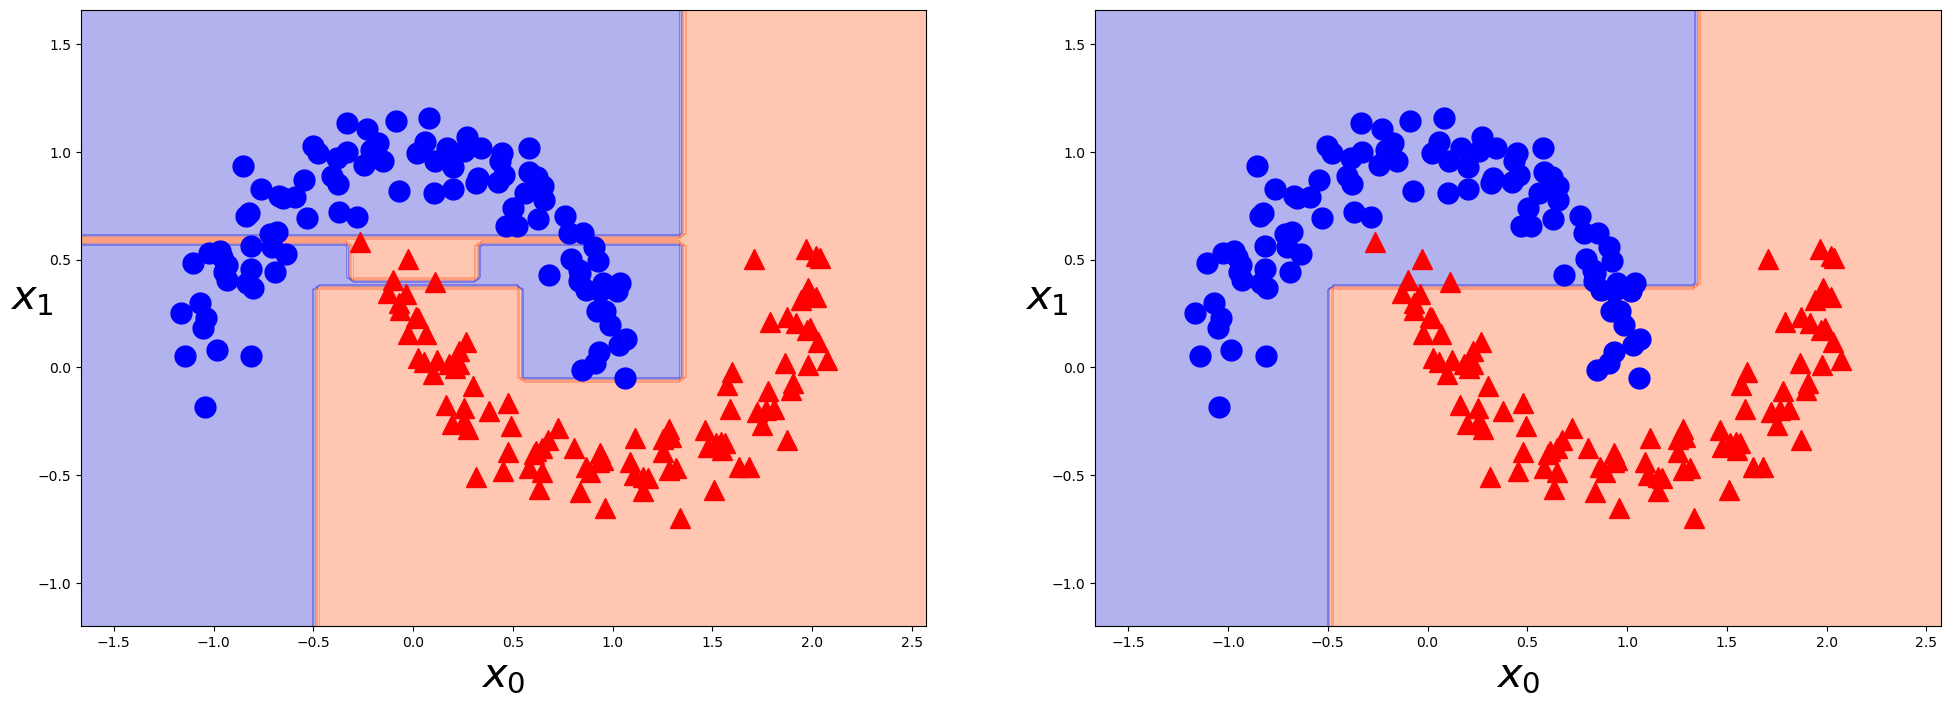

In [7]:
# 決定木の学習結果
plt.figure(figsize=(24,8))
plt.subplot(121)
plot_decision_boundary(tree_clf,x,y)
plot_dataset(x,y)

# 決定木の学習結果(max_depth=3を設定)
plt.subplot(122)
plot_decision_boundary(tree_clf_3,x,y)
plot_dataset(x,y)

plt.show()

In [8]:
# 決定木で回帰問題を実行する
import mglearn
from sklearn.tree import DecisionTreeRegressor

In [9]:
reg_x,reg_y = mglearn.datasets.make_wave(n_samples=100)
tree_reg = DecisionTreeRegressor().fit(reg_x,reg_y)
tree_reg_3 = DecisionTreeRegressor(max_depth=3).fit(reg_x,reg_y)

In [10]:
def plot_regression_predictions(tree_reg,x,y):
    x1 = np.linspace(x.min()-1,x.max()+1,500).reshape(-1,1)
    y_pred = tree_reg.predict(x1)
    plt.xlabel('x',fontsize=30)
    plt.ylabel('y',fontsize=30,rotation=0)
    plt.plot(x,y,"bo",ms=15)
    plt.plot(x1,y_pred,"r-",linewidth=6)

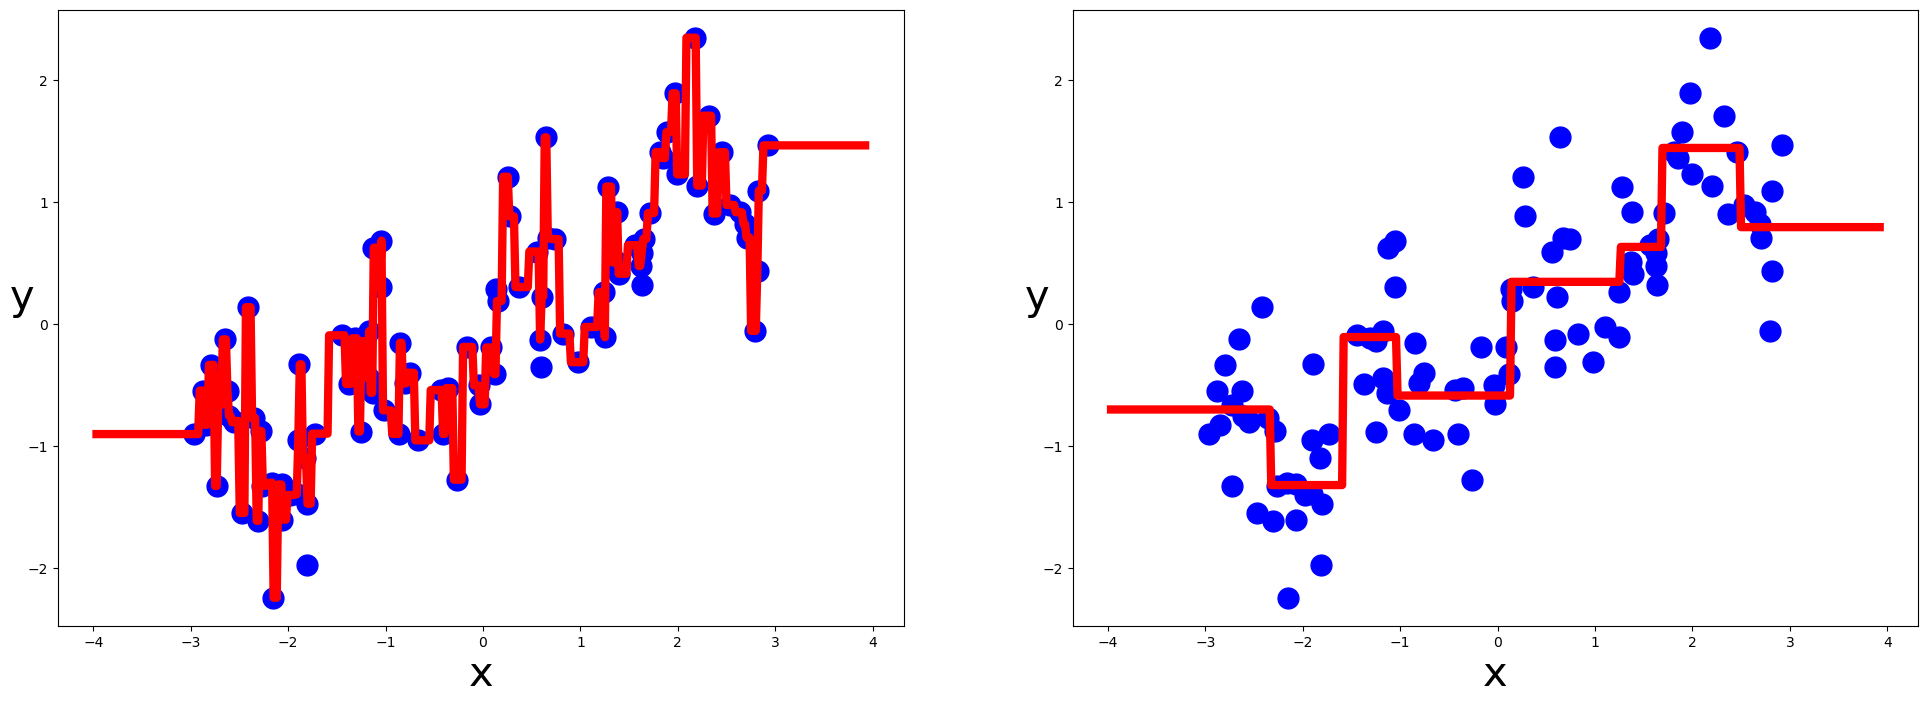

In [11]:
plt.figure(figsize=(24,8))

plt.subplot(121)
plot_regression_predictions(tree_reg,reg_x,reg_y)

plt.subplot(122)
plot_regression_predictions(tree_reg_3,reg_x,reg_y)

plt.show()